<h1 style="color:rgb(0,120,170)">Hands-On AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 (Assignment) -- Reading, handling, visualization of datasets</h2>

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules:

- <code>u1_utils</code>
- <code>IPython.display</code>
- <code>numpy</code>
- <code>PIL.Image</code>

In [2]:
import u1_utils as u1
import IPython.display as ipd
import numpy as np
import PIL.Image

Afterwards, check if the <code>numpy</code> module was correctly imported, by computed the <i>minimum</i> of <code>[4, 2, 6]</code> and printing the result.

In [3]:
a = min([4, 2, 6])
print(a)

2


# Exercise 1
In this exercise you will be working with a data set composed of low-resolution images of handwritten <i>digits</i>. This data set has 10 classes in total, whereas each corresponds to a digit ranging from 0 to 9. It was originally created by the <i>National Institute of Standards and Technology (NIST)</i> and processed later on, in order to get a more easier-to-handle data set. For curious minds, more information regarding this data set can be found at:

<cite>M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.</cite>

Your <b>first task</b> of this exercise is to get more familiar with this data set. In order to achieve this, perform the following steps:

- Load the <i>digits</i> data set (<i>hint:</i> have a look at the provided utilities file).
- Print a <i>list</i> comprising the <i>keys</i> of the data set.
- Compute and print the amount of <i>samples</i> in the data set.


- ... and follow any further instructions.

In [4]:
digits = u1.load_digits() #?? has to be replaced with your solution
print(list(digits.keys()))
print('{}'.format(len(digits[r"data"])), 'samples')

['data', 'target', 'target_names', 'images', 'DESCR']
1797 samples


Additionally, it is always a good idea to directly look at the data (if applicable) in order to get more insight. For this very purpose, plot the first <i>nine</i> digits and try to identifiy the corresponding labels (without looking at the <code>target</code> key).

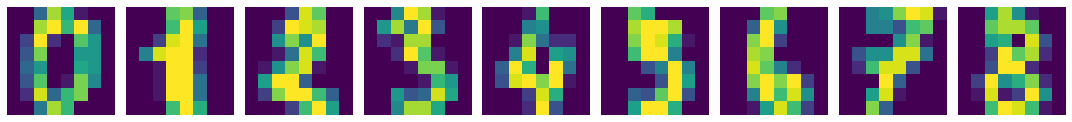

In [5]:
u1.plot_digit_images([digits.images[i] for i in range(0,9)])  #?? has to be replaced with your solution


0, 1, 2, 3, 4, 5, 6, 7, 8

Pictures are nice and all, especially to get a brief overview of the data, but they hide some very important detail in this case: what are the <i>features</i> of the current digit data set? They are not so easy to spot at a first glance, to the contrary of the iris data set of the lecture.

Maybe <i>displaying</i> the digits in a pretty table helps?

In [6]:
u1.display_digits_pretty_table(digits)

Px. 0  Px. 1  Px. 2  Px. 3  Px. 4  Px. 5  Px. 6  Px. 7  Px. 8  Px. 9  \
0       0.0    0.0    5.0   13.0    9.0    1.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0   12.0   13.0    5.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    4.0   15.0   12.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    7.0   15.0   13.0    1.0    0.0    0.0    0.0    8.0   
4       0.0    0.0    0.0    1.0   11.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1792    0.0    0.0    4.0   10.0   13.0    6.0    0.0    0.0    0.0    1.0   
1793    0.0    0.0    6.0   16.0   13.0   11.0    1.0    0.0    0.0    0.0   
1794    0.0    0.0    1.0   11.0   15.0    1.0    0.0    0.0    0.0    0.0   
1795    0.0    0.0    2.0   10.0    7.0    0.0    0.0    0.0    0.0    0.0   
1796    0.0    0.0   10.0   14.0    8.0    1.0    0.0    0.0    0.0    2.0   

      ...  Px. 55  Px. 56  Px. 57  Px. 58  Px. 59  Px. 60  Px. 61  Px. 62  \
0     ...     0.0     0.0     0.0     6.0    13.0    10.0     0.0     0.0   
1     ...     0.0     0.0     0.0     0.0    11.0    16.0    10.0     0.0   
2     ...     0.0     0.0     0.0     0.0     3.0    11.0    16.0     9.0   
3     ...     0.0     0.0     0.0     7.0    13.0    13.0     9.0     0.0   
4     ...     0.0     0.0     0.0     0.0     2.0    16.0     4.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
1792  ...     0.0     0.0     0.0     2.0    14.0    15.0     9.0     0.0   
1793  ...     0.0     0.0     0.0     6.0    16.0    14.0     6.0     0.0   
1794  ...     0.0     0.0     0.0     2.0     9.0    13.0     6.0     0.0   
1795  ...     0.0     0.0     0.0     5.0    12.0    16.0    12.0     0.0   
1796  ...     0.0     0.0     1.0     8.0    12.0    14.0    12.0     1.0   

      Px. 63  Digit  
0        0.0      0  
1        0.0      1  
2        0.0      2  
3        0.0      3  
4        0.0      4  
...      ...    ...  
1792     0.0      9  
1793     0.0      0  
1794     0.0      8  
1795     0.0      9  
1796     0.0      8  

[1797 rows x 65 columns]

Now as we are more familiar with the data set, we want to compute the <i>principal components</i> in order to apply a dimensionality reduction. Otherwise plotting and comparing more than <i>two</i> features would be a bit of a hassle. Your <b>second task</b> comprises:
- Apply <i>PCA</i> and project the digit data set down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

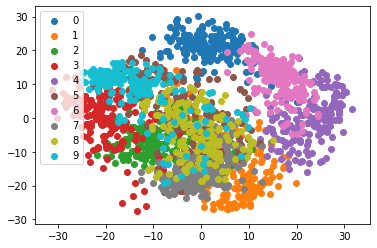

In [8]:
digits_reduced_pca = u1.apply_PCA(n_components=2, data=digits.data)

u1.plot_points_2d_color(digits_reduced_pca, digits)


As stated in the lecture, different projection methods may lead to different results. Sometimes one method delivers a superior solution in contrast to others.
- Reduce the digit data set using <i>tSNE</i> to $d=2$.
- Display the resulting data in a colored <i>scatter plot</i>.
- Discuss any differences between the plots of <i>PCA</i> and <i>tSNE</i>.

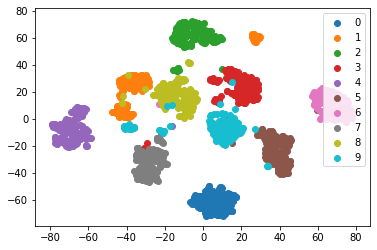

In [149]:
digits_reduced_tsne = u1.apply_tSNE(n_components=2, data=digits.data, perplexity=20)
u1.plot_points_2d_color(digits_reduced_tsne, digits)


t-SNE is another method to separate the data in clusters. The difference to PCA is that t-SNE has feature "perplexity". Is the perplexity low (for example 1), the clusters are less seperated than by a high perplexity (for example 100). Your choice of number determines the quality of outcome.

The <b>third</b> and <b>last task</b> of this exericse is to pretend, that it is <i>not</i> known, how many different digits the data set is comprised of. Apply <i>$k$-Means Clustering</i> with different values for $k$ as well as <i>Affinity Propagation</i>. Shortly discuss the different behaviors of both algorithms as well as their results. What do you observe?

In [150]:
kmeans = u1.apply_k_means(k=10, data=digits.data)
print("Assigned clusters: " +  str(u1.num_targets(kmeans)))
u1.print_species_and_cluster_side_by_side(digits, kmeans)


Assigned clusters: 10


Species  Cluster
0           0        4
1           1        3
2           2        6
3           3        5
4           4        8
...       ...      ...
1792        9        5
1793        0        4
1794        8        6
1795        9        5
1796        8        6

[1797 rows x 2 columns]

Assigned clusters: 103


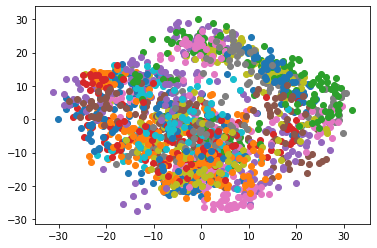

In [151]:
aff = u1.apply_affinity_prop(data=digits.data)
print("Assigned clusters: " +  str(u1.num_targets(aff)))
u1.plot_points_2d_color(digits_reduced_pca, digits, targets=aff, legend=False )


Different behaviors and results: 
k-means shows exactly which image belongs to which label/digit and Cluster.
Affinity Propagation has instead of that different colored points in a 2-dimensional field (diagram) that form clusters. Here you don't know which image belongs to which point in the diagram, but you can see how similar the different points and clusters are through the size of space between it. 
--> k-means: the user decides how much clusters exist. Affinity Propagation: the system decides how much clusters are formed. The algorithm found a lot of clusters (103). Do we have any use in interpreting the dataset when there are so much clusters?

# Exercise 2
In this exercise, you will be experimenting with a picture of our research dog <i>Charlie</i> (don't worry, he is fine with that). As always, try to get familiar with the data you're working with. To be more precise, as the <b>first task</b>, perform the following actions:
- Load a picture of Charlie (use <code>charlie_1.jpg</code>).
- Visualise Charlie in his original state.
- Print the shape of the loaded image and describe the parts.

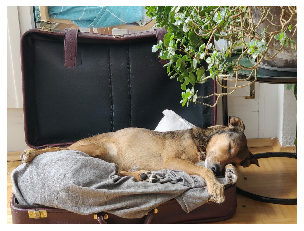

Shape of Charlie: (1200, 1599, 3)


In [152]:
from PIL import Image
image_path = 'resources/charlie_1.jpg'
with Image.open(image_path) as image_data:
    image_charlie = np.array(image_data)
u1.plot_image(image_path)
print('Shape of Charlie: {}'.format(image_charlie.shape))

Remember, what the three characters <i>R</i>, <i>G</i> and <i>B</i> stand for in <i>RGB</i>, and visualize them accordingly.

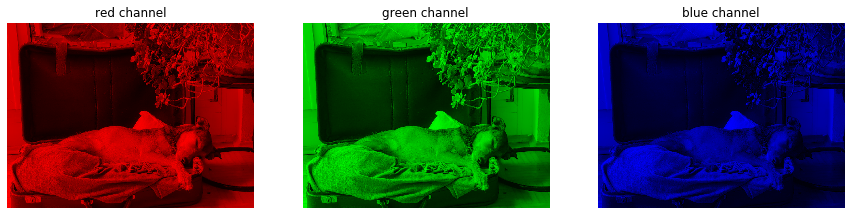

In [153]:
u1.plot_image_channels_rgb(image_path)

R=Red, G=Green, B=Blue

Additionally, think about a variant of this color model, which incorporates a fourth part describing the <i>transparency</i> of the image. Set the <i>alpha channel</i> to be the ratio $\frac{height}{width}$ of the image.

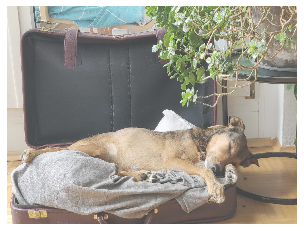

In [155]:
u1.plot_image_rgba(image_path, alpha=1200/1599)

Moreover, display a more nostalgic version of Charlies image by transforming it to <i>grayscale</i>.

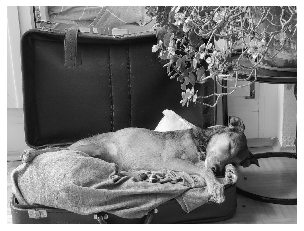

In [154]:
u1.plot_image_grayscale(image_path)

As your <b>second task</b>, you will have to produce more images of Charlie, all modified in a slightly different way:
- Rotate the image in a way, so that <i>width</i> and <i>height</i> are exchanged with each other.
- Charlie wants to lie on his right side, for a change. Can you help him?
- Sometimes, the world seems to be upside down. Reflect this on Charlies image.
- There is a lot of background in the image, try to get rid of it by <i>cropping</i>.
- Blur the image in a way, so that the details of the leaves are barely visible.

<i>Please keep in mind, to create an own notebook cell for each of this variations. Otherwise, the modifications will blend into each other!</i>

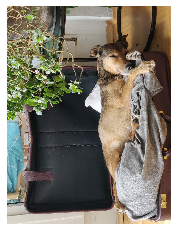

In [133]:
u1.rotate_image(image_path, angle=90)

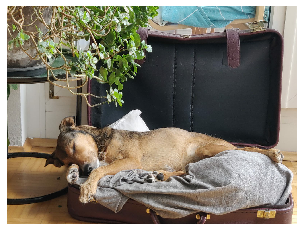

In [173]:
u1.flip_image(image_path, type='horizontal')

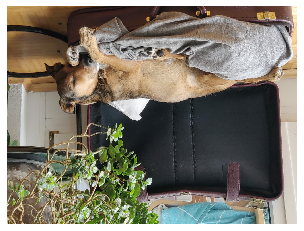

In [164]:
u1.rotate_image(image_path, angle=180)

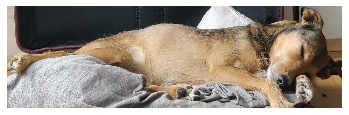

In [212]:
u1.crop_image(image_path, left=65, top=600, width=1320, height=400)

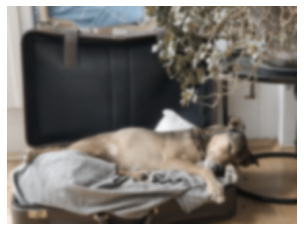

In [171]:
u1.blur_image(image_path, sigma=8)

Again, remember the meaning of <i>RGB</i> and plot the corresponding histogram. Which kind of information can you gather from the visualization?

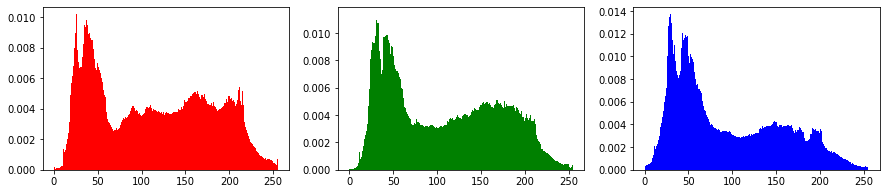

In [156]:
u1.plot_histogram(image_path)


The historgrams show the coloration within the picture. The blue historgram shall be explained as an example. The dark blue parts of the picture are visualised on the left side in the histogram. The axis of ordinates shows that there is little very 
dark blue in the picture. Lot of more or less dark blue exists in the picture when the horizontal axis is circa 25 untill 65. On the right side of the histogram is the portion of light blue of the picture. Because the diagram doesn't rate at the axis of ordinates high, there is not much light blue portion in the picture. 
The same rules are also for the red and green histogram correct.

Using previous visualizations, we want to segment Charlies image. As your <b>third</b> and <b>last task</b> of this exercise, perform the following steps:
- Cut of the peak of the <i>first</i> histogram.
- Cut of the peak of the <i>second</i> histogram.
- Cut of the peak of the <i>last</i> histogram.
- Cut of the peak of <i>all</i> histograms.

<i>Please keep in mind, to create an own notebook cell for each of this variations. Otherwise, the modifications will blend into each other!</i>

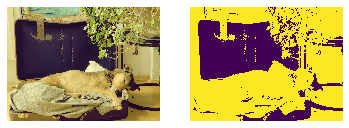

In [188]:
u1.segment(image_path, ">60", ">0", ">0")

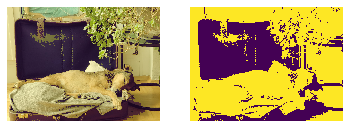

In [189]:
u1.segment(image_path, ">0", ">60", ">0")

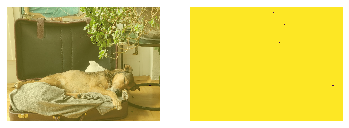

In [190]:
u1.segment(image_path, ">0", ">0", ">60")

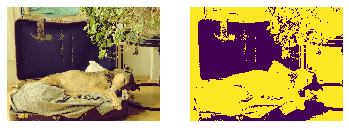

In [191]:
u1.segment(image_path, ">60", ">60", ">60")

# Exercise 3
The last exercise of this assignment is about sequence data, more precisely, <i>audio data</i>. The sample of our choice is a short <i>piano</i> composition, which will be modified by adding various sine-like signals, as well as analysed by visualizing different characteristics.

To get started with your <b>first task</b> of this exercise, perform the following steps:
- Load the first $T=20$ seconds of the piano composition (use <code>piano.wav</code>).
- Plot the corresponding audio signal.
- Plot the <i>sampling rate</i> of the signal.

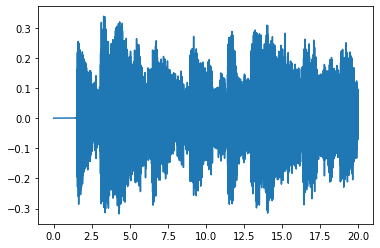

Sampling rate: 44100Hz


In [144]:
audio_path = r'resources/piano.wav'
duration = 20
audio_signal, sampling_rate = u1.read_wav_file(audio_path, t=duration)
u1.plot_wave(audio_signal, duration, sampling_rate)
print('Sampling rate: {}Hz'.format(sampling_rate))

As always when working with newly gathered data, get familiar with it. In case of audio signals, listen to them.
- Create a separate <code>Audio</code> object.
- Keep in mind, to set the <i>sampling rate</i> appropriately.

In [157]:
x, sr = u1.read_wav_file(audio_path, t=duration)
ipd.Audio(x,rate=sr)    


Before applying any modifications to the audio signal, perform the following analysis as the <b>second task</b>:
- Perform a <i>Fourier transform</i>.
- Display the resulting frequency spectrum (cut off at $1\,000\ Hz$).

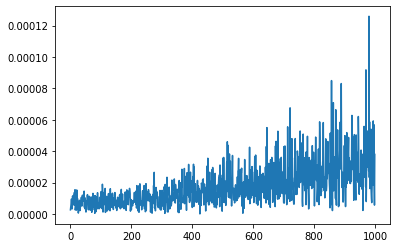

In [158]:
fx, fx_pow = u1.apply_fourier_trans(x)
u1.plot(fx_pow[0:1000])

The frequency spectrum is not the only type of visualization, which is often used to analyse audio data. The <i>spectrogram</i>, on the other hand, preserves information about <i>time</i>, which furthe helps, to get more insight into the data.
- Display the corresponding <i>spectrogram</i> and omit the first <i>two</i> seconds.
- Experiment with different <i>window sizes</i> (at least <i>three</i> between $16\,384$ and $256$).

What do you observe?

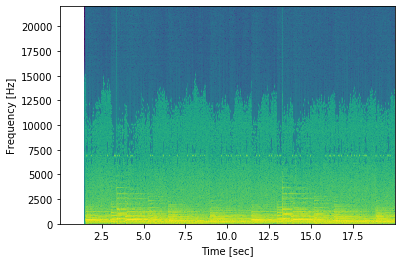

In [170]:
u1.plot_spec(x, window_size=1025, sr=sr)

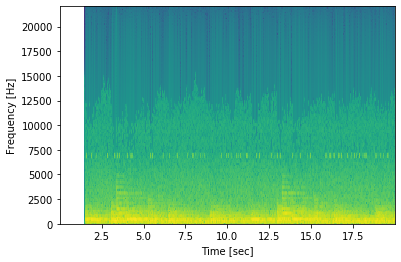

In [172]:
u1.plot_spec(x, window_size=300, sr=sr)

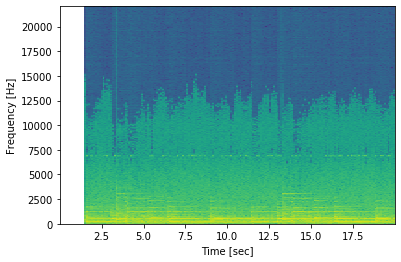

In [173]:
u1.plot_spec(x, window_size=5000, sr=sr)

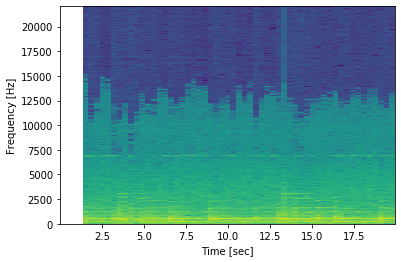

In [175]:
u1.plot_spec(x, window_size=15000, sr=sr)

When the window size is smaller, you get more information about the file. It seems more accurate at which second which value the frequency has.

The <b>third</b> and <b>last task</b> of this exercise as well as assignment, is to create artificial <i>sine-like</i> waves and add them to our piano sample. Keep in mind to use the same <i>sampling rate</i> as well as the same <i>duration</i> as the piano sample.
- Create wave signal with $f = 150\ Hz$ and set the <i>first ten</i> seconds to $0\ Hz$.
- Create wave signal with $f = 232\ Hz$ and set the <i>last ten</i> seconds to $0\ Hz$.
- Add both to the piano sample and listen to the result.

In [38]:
#?? has to be replaced with your solution
wave_one = u1.generate_wave(150, audio_signal.shape[0] / sampling_rate, sampling_rate)
wave_two = u1.generate_wave(232, audio_signal.shape[0] / sampling_rate, sampling_rate)
wave_one[:10 * sampling_rate] = 0
wave_two[wave_two.shape[0]  - (10 * sampling_rate):] = 0
modified_signal = wave_one + wave_two + audio_signal
ipd.Audio(modified_signal, rate=sampling_rate)

Last but not least, again analyse the <i>newly</i> created audio signal:
- Perform a <i>Fourier transform</i>.
- Display the resulting frequency spectrum (cut off at $1\,000\ Hz$).

Do you see any difference to the frequency spectrum of the <i>original</i> piano signal?

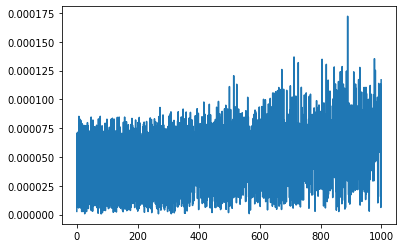

In [39]:
fx, fx_pow = u1.apply_fourier_trans(modified_signal)
u1.plot(fx_pow[0:1000])

Yes, the modified version has bigger amplitudes.

Now we want to have an analysis of the <i>modified</i> signal which preserves information about <i>time</i>:
- Display the corresponding <i>spectrogram</i> and omit the first <i>two</i> seconds.
- Experiment with different <i>window sizes</i> (at least <i>three</i> between $16\,384$ and $256$).

What do you observe? Can you see any difference to the spectrogram of the <i>original</i> piano signal?

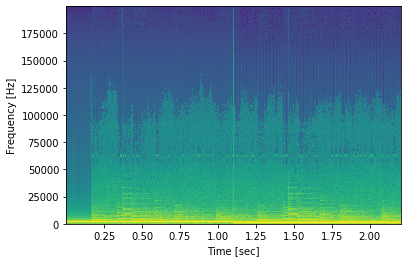

In [204]:
u1.plot_spec(modified_signal, window_size=1025, sr=400_000)

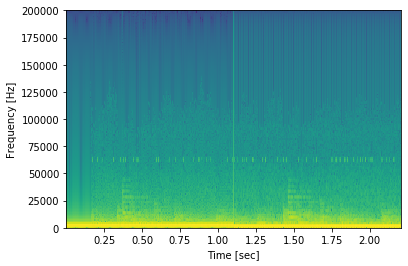

In [203]:
u1.plot_spec(modified_signal, window_size=300,sr=400_000)

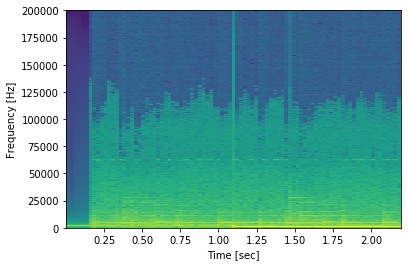

In [196]:
u1.plot_spec(modified_signal,window_size=10000,sr=400_000)

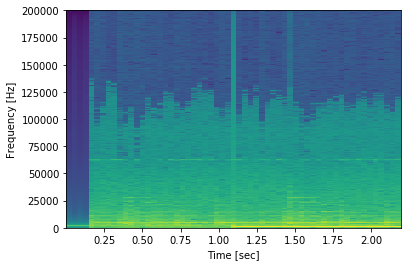

In [206]:
u1.plot_spec(modified_signal,window_size=15000,sr=400_000)

Yes, for example, you can see at circa 1.15 seconds a signal with a very high frequency by the modified signal which is missed by the old version of piano play.